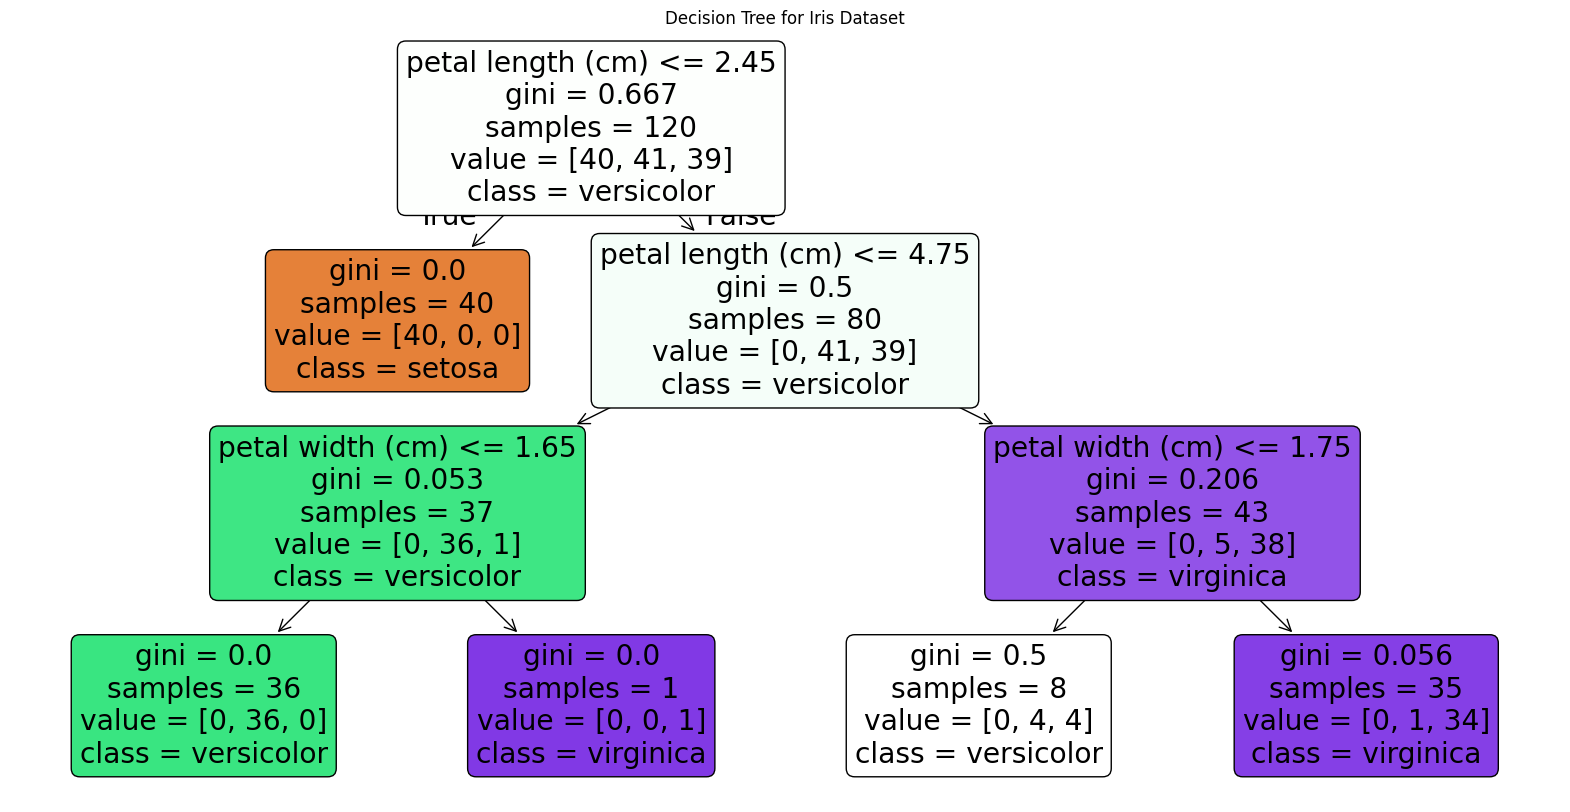

Training Accuracy: 0.958
Testing Accuracy: 1.000

Feature Importance:
             feature  importance
2  petal length (cm)    0.934626
3   petal width (cm)    0.065374
0  sepal length (cm)    0.000000
1   sepal width (cm)    0.000000

Sample Prediction: setosa


c:\Users\DeepanShanmugam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the decision tree
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

# Create visualization
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=iris.feature_names, 
          class_names=iris.target_names, 
          filled=True, rounded=True)
plt.title("Decision Tree for Iris Dataset")
plt.show()

# Print model accuracy
print(f"Training Accuracy: {dt.score(X_train, y_train):.3f}")
print(f"Testing Accuracy: {dt.score(X_test, y_test):.3f}")

# Print feature importance
feature_importance = pd.DataFrame({
    'feature': iris.feature_names,
    'importance': dt.feature_importances_
})
print("\nFeature Importance:")
print(feature_importance.sort_values('importance', ascending=False))

# Make predictions
sample_prediction = dt.predict([[5.1, 3.5, 1.4, 0.2]])
print(f"\nSample Prediction: {iris.target_names[sample_prediction[0]]}")

ACCURACY SCORES:
--------------------------------------------------
Unpruned Tree Training Accuracy: 1.000
Unpruned Tree Testing Accuracy: 1.000
Pruned Tree Training Accuracy: 0.950
Pruned Tree Testing Accuracy: 0.967

CONFUSION MATRICES:
--------------------------------------------------
Unpruned Tree Confusion Matrix:


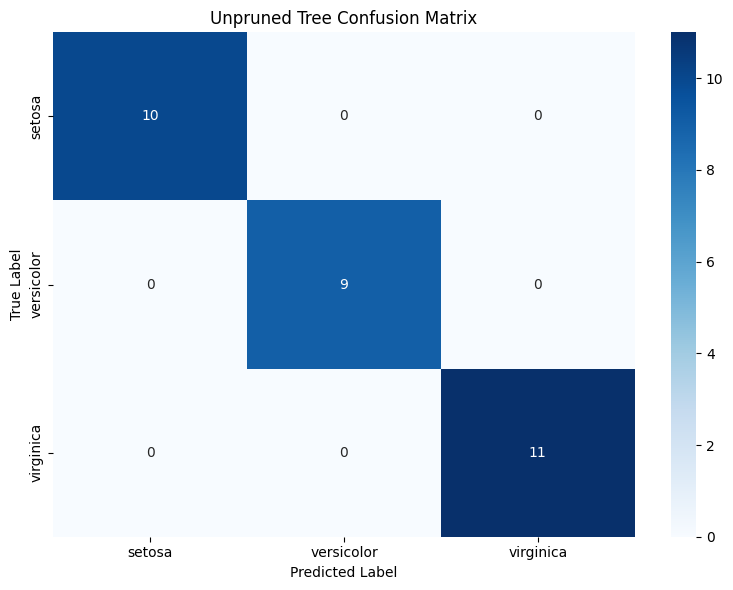


Pruned Tree Confusion Matrix:


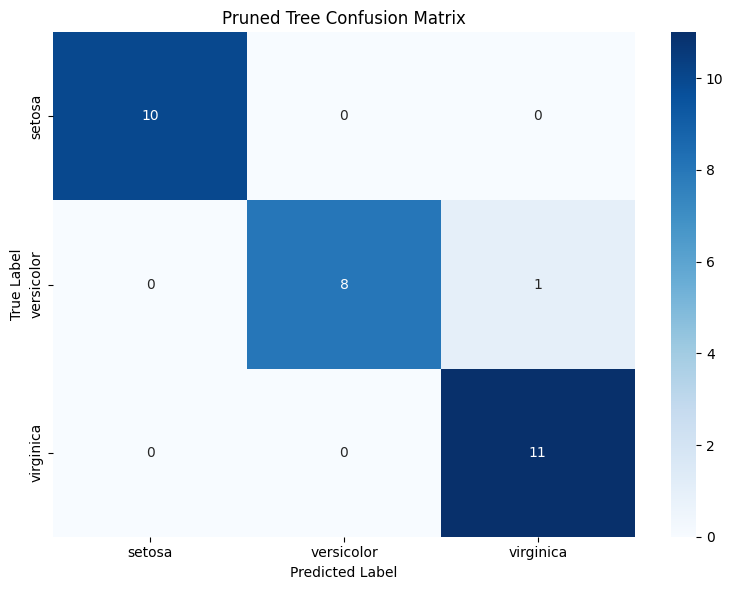


CLASSIFICATION REPORTS:
--------------------------------------------------
Unpruned Tree Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Pruned Tree Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



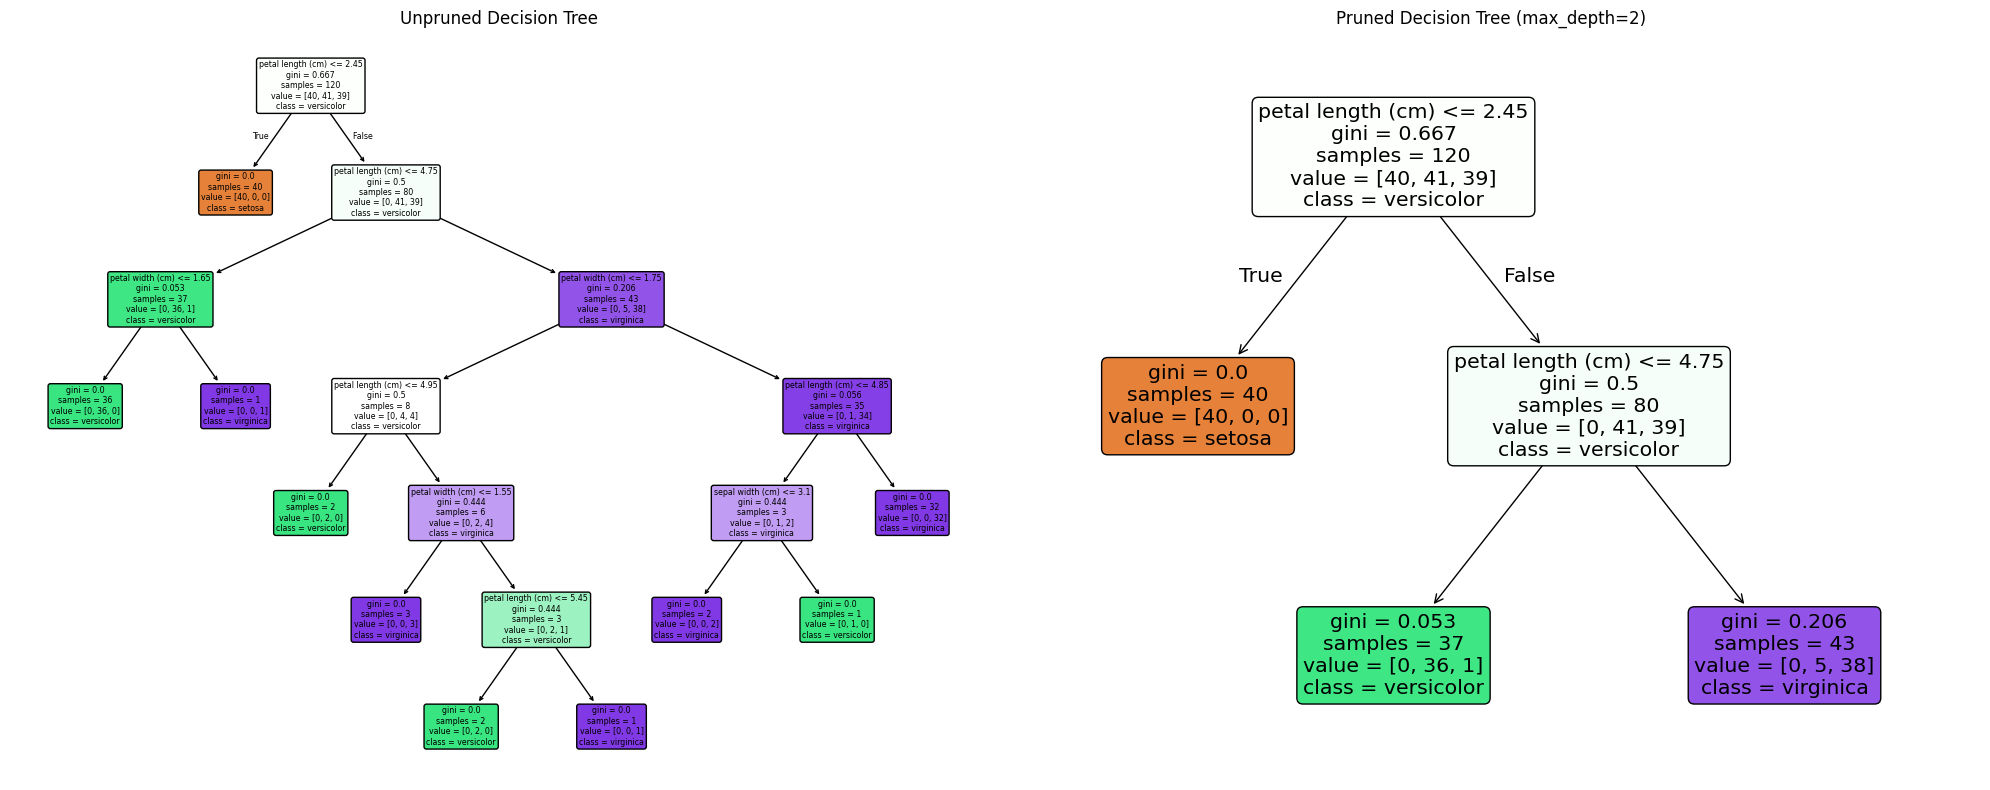


METRICS COMPARISON:
--------------------------------------------------
              Metric  Unpruned    Pruned
0  Training Accuracy       1.0  0.950000
1   Testing Accuracy       1.0  0.966667

TREE COMPLEXITY:
--------------------------------------------------
Unpruned Tree Depth: 6
Pruned Tree Depth: 2
Unpruned Tree Number of Leaves: 10
Pruned Tree Number of Leaves: 3


In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train both trees
dt_unpruned = DecisionTreeClassifier(random_state=42)
dt_pruned = DecisionTreeClassifier(max_depth=2, random_state=42)

dt_unpruned.fit(X_train, y_train)
dt_pruned.fit(X_train, y_train)

# Make predictions
y_pred_unpruned = dt_unpruned.predict(X_test)
y_pred_pruned = dt_pruned.predict(X_test)

# 1. Accuracy Scores
print("ACCURACY SCORES:")
print("-" * 50)
print(f"Unpruned Tree Training Accuracy: {dt_unpruned.score(X_train, y_train):.3f}")
print(f"Unpruned Tree Testing Accuracy: {dt_unpruned.score(X_test, y_test):.3f}")
print(f"Pruned Tree Training Accuracy: {dt_pruned.score(X_train, y_train):.3f}")
print(f"Pruned Tree Testing Accuracy: {dt_pruned.score(X_test, y_test):.3f}")

# 2. Confusion Matrices
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=iris.target_names,
                yticklabels=iris.target_names)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

print("\nCONFUSION MATRICES:")
print("-" * 50)
print("Unpruned Tree Confusion Matrix:")
plot_confusion_matrix(y_test, y_pred_unpruned, "Unpruned Tree Confusion Matrix")
print("\nPruned Tree Confusion Matrix:")
plot_confusion_matrix(y_test, y_pred_pruned, "Pruned Tree Confusion Matrix")

# 3. Classification Reports
print("\nCLASSIFICATION REPORTS:")
print("-" * 50)
print("Unpruned Tree Classification Report:")
print(classification_report(y_test, y_pred_unpruned, 
                          target_names=iris.target_names))

print("\nPruned Tree Classification Report:")
print(classification_report(y_test, y_pred_pruned, 
                          target_names=iris.target_names))

# Visualize both trees
plt.figure(figsize=(20,8))

plt.subplot(1, 2, 1)
plot_tree(dt_unpruned, feature_names=iris.feature_names, 
          class_names=iris.target_names, 
          filled=True, rounded=True)
plt.title("Unpruned Decision Tree")

plt.subplot(1, 2, 2)
plot_tree(dt_pruned, feature_names=iris.feature_names, 
          class_names=iris.target_names, 
          filled=True, rounded=True)
plt.title("Pruned Decision Tree (max_depth=2)")

plt.tight_layout()
plt.show()

# Additional metrics comparison
metrics_comparison = pd.DataFrame({
    'Metric': ['Training Accuracy', 'Testing Accuracy'],
    'Unpruned': [dt_unpruned.score(X_train, y_train), 
                 dt_unpruned.score(X_test, y_test)],
    'Pruned': [dt_pruned.score(X_train, y_train), 
               dt_pruned.score(X_test, y_test)]
})

print("\nMETRICS COMPARISON:")
print("-" * 50)
print(metrics_comparison)

# Tree complexity comparison
print("\nTREE COMPLEXITY:")
print("-" * 50)
print(f"Unpruned Tree Depth: {dt_unpruned.get_depth()}")
print(f"Pruned Tree Depth: {dt_pruned.get_depth()}")
print(f"Unpruned Tree Number of Leaves: {dt_unpruned.get_n_leaves()}")
print(f"Pruned Tree Number of Leaves: {dt_pruned.get_n_leaves()}")

ACCURACY SCORES:
--------------------------------------------------
Training Accuracy: 0.950
Testing Accuracy: 1.000

CONFUSION MATRIX:
--------------------------------------------------


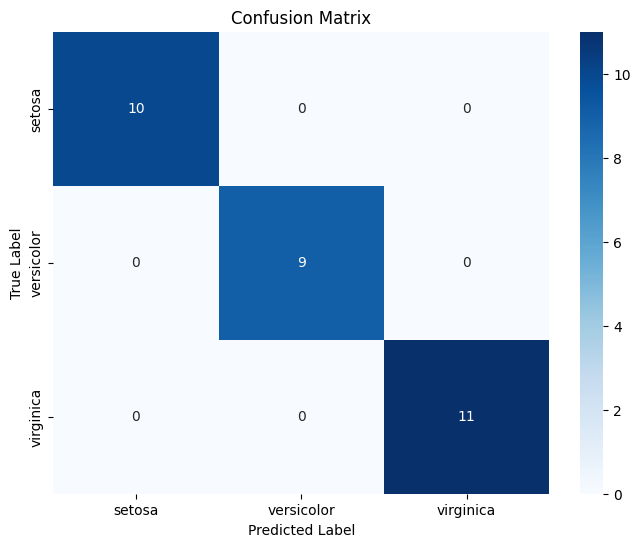


CLASSIFICATION REPORT:
--------------------------------------------------
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



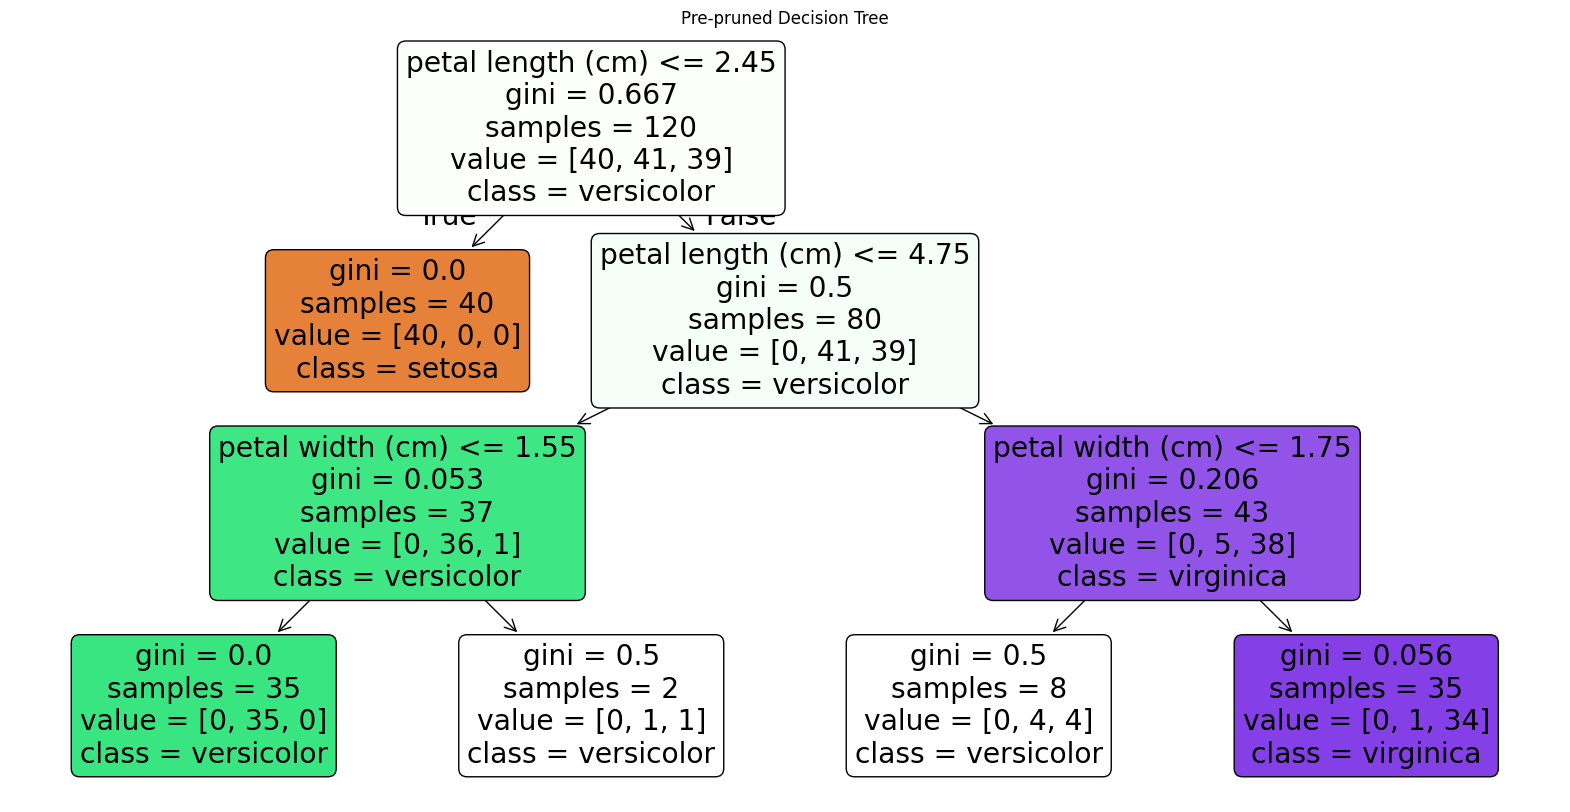

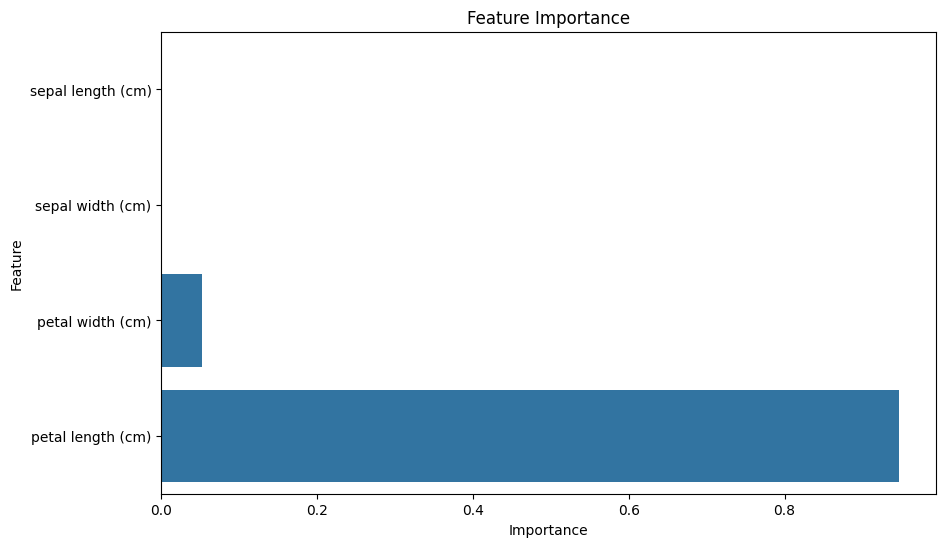


TREE STRUCTURE INFORMATION:
--------------------------------------------------
Tree Depth: 3
Number of Leaves: 5

SAMPLE PREDICTIONS:
--------------------------------------------------
Sample 1:
Actual: versicolor
Predicted: versicolor

Sample 2:
Actual: setosa
Predicted: setosa

Sample 3:
Actual: virginica
Predicted: virginica

Sample 4:
Actual: versicolor
Predicted: versicolor

Sample 5:
Actual: versicolor
Predicted: versicolor


PRE-PRUNING PARAMETERS:
--------------------------------------------------
max_depth: 3
min_samples_split: 5
min_samples_leaf: 2
max_features: 3


In [4]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create decision tree with pre-pruning parameters
dt_prepruned = DecisionTreeClassifier(
    max_depth=3,                # Maximum depth of tree
    min_samples_split=5,        # Minimum samples required to split node
    min_samples_leaf=2,         # Minimum samples required at leaf node
    max_features=3,             # Maximum number of features to consider
    random_state=42
)

# Train the model
dt_prepruned.fit(X_train, y_train)

# Make predictions
y_pred = dt_prepruned.predict(X_test)

# 1. Print Accuracy Scores
print("ACCURACY SCORES:")
print("-" * 50)
print(f"Training Accuracy: {dt_prepruned.score(X_train, y_train):.3f}")
print(f"Testing Accuracy: {dt_prepruned.score(X_test, y_test):.3f}")

# 2. Confusion Matrix
print("\nCONFUSION MATRIX:")
print("-" * 50)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# 3. Classification Report
print("\nCLASSIFICATION REPORT:")
print("-" * 50)
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# 4. Visualize the tree
plt.figure(figsize=(20,10))
plot_tree(dt_prepruned, 
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True, 
          rounded=True)
plt.title("Pre-pruned Decision Tree")
plt.show()

# 5. Feature Importance
feature_importance = pd.DataFrame({
    'feature': iris.feature_names,
    'importance': dt_prepruned.feature_importances_
})

plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', 
            data=feature_importance.sort_values('importance', ascending=True))
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# 6. Tree Structure Information
print("\nTREE STRUCTURE INFORMATION:")
print("-" * 50)
print(f"Tree Depth: {dt_prepruned.get_depth()}")
print(f"Number of Leaves: {dt_prepruned.get_n_leaves()}")

# 7. Compare predictions for sample data
sample_data = X_test[:5]
predictions = dt_prepruned.predict(sample_data)

print("\nSAMPLE PREDICTIONS:")
print("-" * 50)
for i, (actual, pred) in enumerate(zip(y_test[:5], predictions)):
    print(f"Sample {i+1}:")
    print(f"Actual: {iris.target_names[actual]}")
    print(f"Predicted: {iris.target_names[pred]}")
    print()

# 8. Print Pre-pruning Parameters Used
print("\nPRE-PRUNING PARAMETERS:")
print("-" * 50)
params = dt_prepruned.get_params()
important_params = {
    'max_depth': params['max_depth'],
    'min_samples_split': params['min_samples_split'],
    'min_samples_leaf': params['min_samples_leaf'],
    'max_features': params['max_features']
}
for param, value in important_params.items():
    print(f"{param}: {value}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
BEST PARAMETERS:
--------------------------------------------------
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}

Best Cross-Validation Score: 0.958

ACCURACY SCORES:
--------------------------------------------------
Training Accuracy: 0.967
Testing Accuracy: 1.000


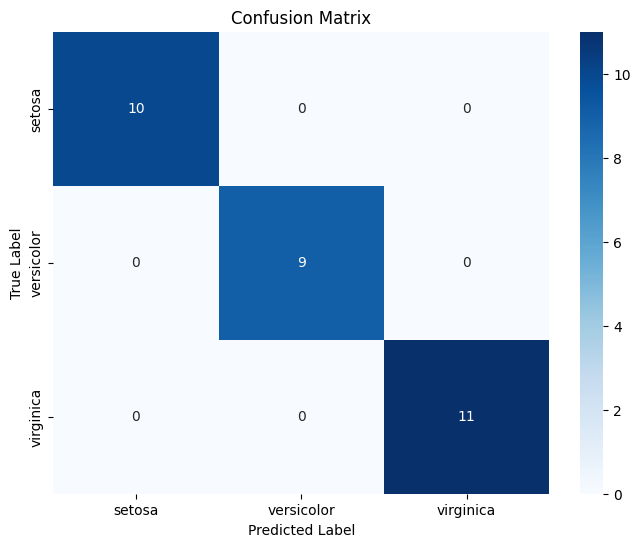


CLASSIFICATION REPORT:
--------------------------------------------------
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



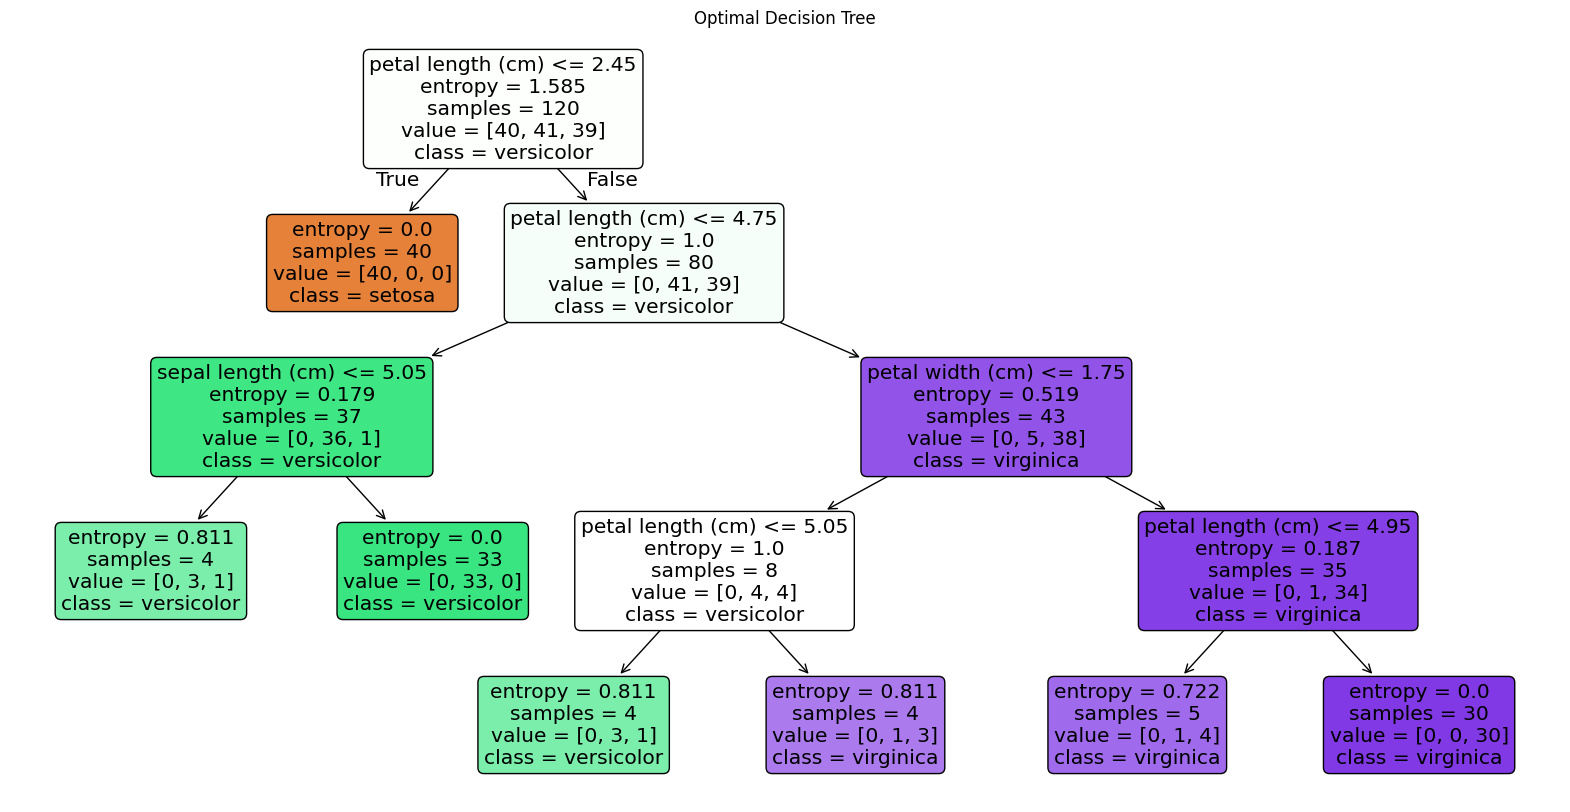

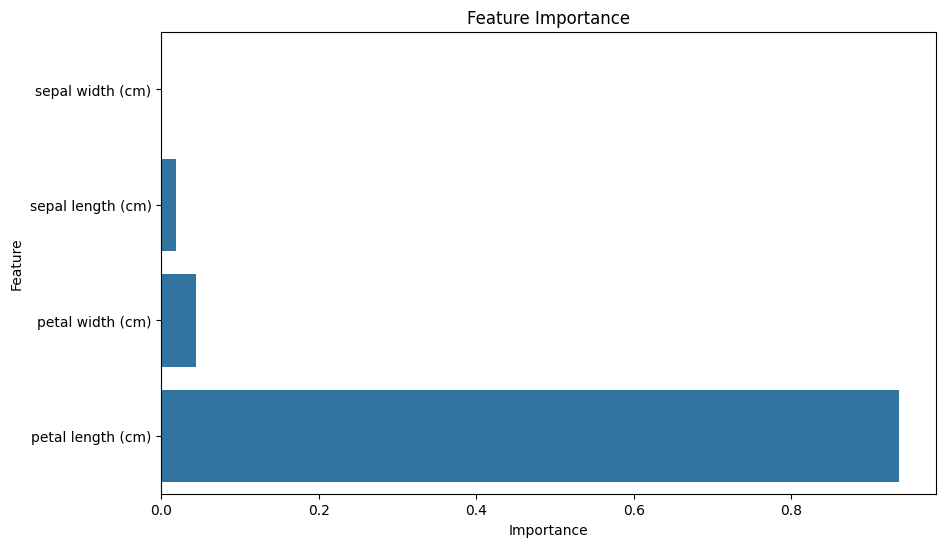

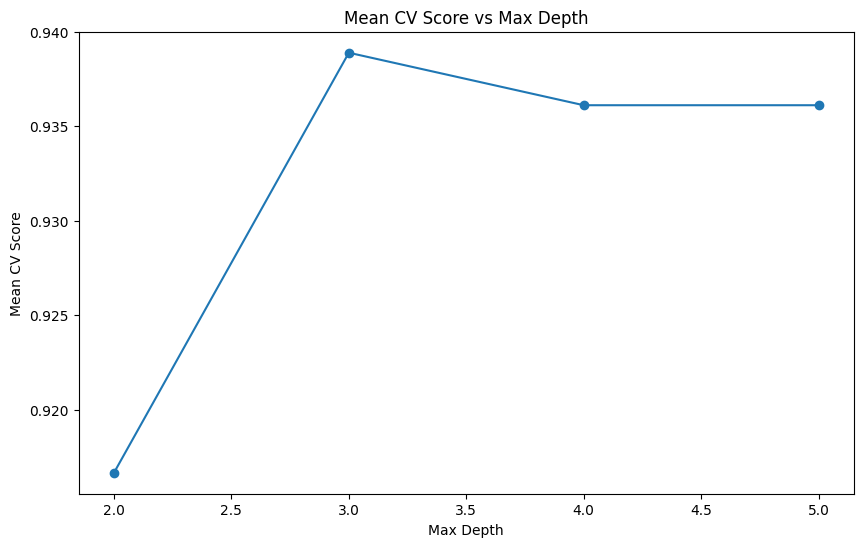


CROSS-VALIDATION RESULTS:
--------------------------------------------------

Parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mean CV Score: 0.917
Std CV Score: 0.046

Parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 5}
Mean CV Score: 0.917
Std CV Score: 0.046

Parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 10}
Mean CV Score: 0.917
Std CV Score: 0.046

Parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2}
Mean CV Score: 0.917
Std CV Score: 0.046

Parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 5}
Mean CV Score: 0.917
Std CV Score: 0.046

Parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 10}
Mean CV Score: 0.917
Std CV Score: 0.046

Parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4, 'min_samples

In [5]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid
param_grid = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Create decision tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy'
)

# Fit the model
grid_search.fit(X_train, y_train)

# Print best parameters and score
print("BEST PARAMETERS:")
print("-" * 50)
print(grid_search.best_params_)
print(f"\nBest Cross-Validation Score: {grid_search.best_score_:.3f}")

# Get best model
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Print Accuracy Scores
print("\nACCURACY SCORES:")
print("-" * 50)
print(f"Training Accuracy: {best_model.score(X_train, y_train):.3f}")
print(f"Testing Accuracy: {best_model.score(X_test, y_test):.3f}")

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print Classification Report
print("\nCLASSIFICATION REPORT:")
print("-" * 50)
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Visualize the best tree
plt.figure(figsize=(20,10))
plot_tree(best_model, 
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True, 
          rounded=True)
plt.title("Optimal Decision Tree")
plt.show()

# Plot Feature Importance
feature_importance = pd.DataFrame({
    'feature': iris.feature_names,
    'importance': best_model.feature_importances_
})

plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', 
            data=feature_importance.sort_values('importance', ascending=True))
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Cross-validation scores for different parameters
cv_results = pd.DataFrame(grid_search.cv_results_)

# Plot mean test scores for max_depth
plt.figure(figsize=(10,6))
scores_depth = cv_results.groupby('param_max_depth')['mean_test_score'].mean()
plt.plot(scores_depth.index, scores_depth.values, marker='o')
plt.title('Mean CV Score vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Mean CV Score')
plt.show()

# Print detailed cross-validation results
print("\nCROSS-VALIDATION RESULTS:")
print("-" * 50)
for i in range(len(cv_results)):
    params = {k.replace('param_', ''): v for k, v in cv_results.iloc[i].items() 
             if k.startswith('param_')}
    print(f"\nParameters: {params}")
    print(f"Mean CV Score: {cv_results.iloc[i]['mean_test_score']:.3f}")
    print(f"Std CV Score: {cv_results.iloc[i]['std_test_score']:.3f}")

# Compare predictions with different parameters
param_sets = [
    {'max_depth': 2, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'max_depth': 3, 'min_samples_split': 5, 'min_samples_leaf': 2},
    grid_search.best_params_
]

print("\nMODEL COMPARISON:")
print("-" * 50)
for params in param_sets:
    model = DecisionTreeClassifier(**params, random_state=42)
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print(f"\nParameters: {params}")
    print(f"Training Accuracy: {train_score:.3f}")
    print(f"Testing Accuracy: {test_score:.3f}")

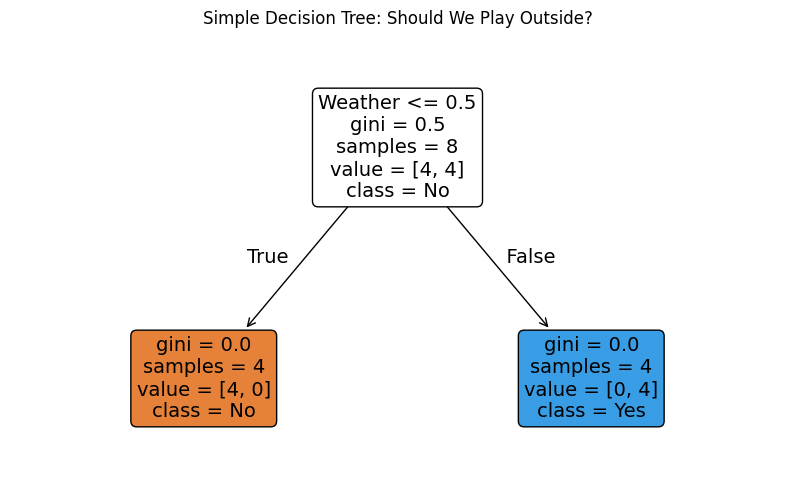

Simple Decision Rule:
If it's sunny → Play Outside
If it's rainy → Don't Play Outside

This simple rule works 100% of the time in our examples


In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Create simple weather data
data = {
    'Weather': ['Sunny', 'Sunny', 'Sunny', 'Rainy', 'Rainy', 'Rainy', 'Sunny', 'Rainy'],
    'Play Outside': ['Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No']
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert categorical variables to numeric
df['Weather'] = df['Weather'].map({'Sunny': 1, 'Rainy': 0})
X = df[['Weather']]
y = df['Play Outside'].map({'Yes': 1, 'No': 0})

# Create and train a simple decision tree with depth=1
tree = DecisionTreeClassifier(max_depth=1)
tree.fit(X, y)

# Visualize the tree
plt.figure(figsize=(10,6))
plot_tree(tree, 
          feature_names=['Weather'],
          class_names=['No', 'Yes'],
          filled=True,
          rounded=True,
          fontsize=14)
plt.title("Simple Decision Tree: Should We Play Outside?")
plt.show()

# Print simple rules
print("Simple Decision Rule:")
print("If it's sunny → Play Outside")
print("If it's rainy → Don't Play Outside")

# Show accuracy
correct_predictions = sum(tree.predict(X) == y)
total_examples = len(y)
accuracy = (correct_predictions / total_examples) * 100

print(f"\nThis simple rule works {accuracy:.0f}% of the time in our examples")

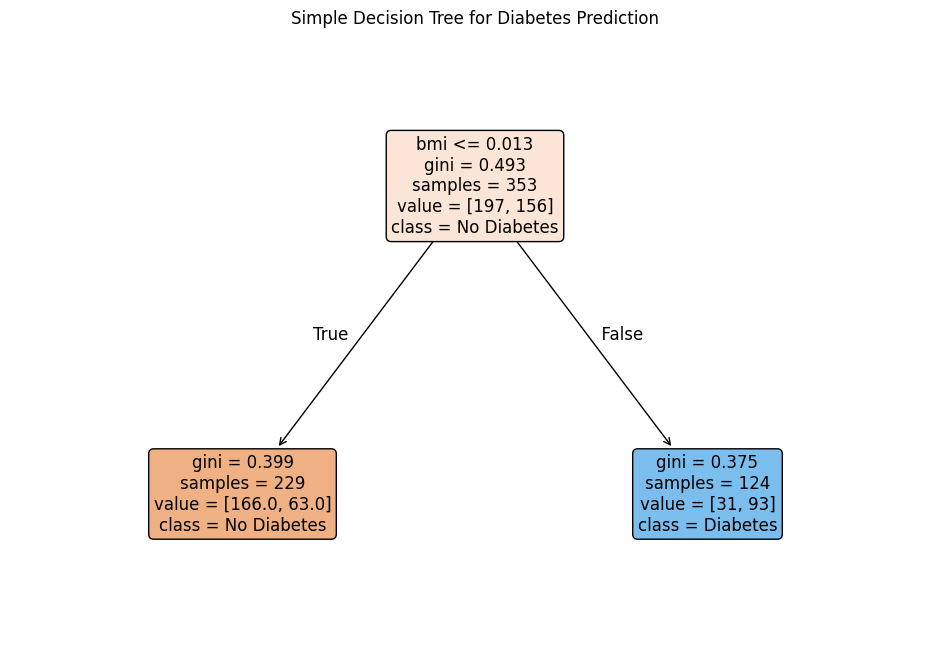

Model Performance:
--------------------------------------------------
Accuracy: 0.65


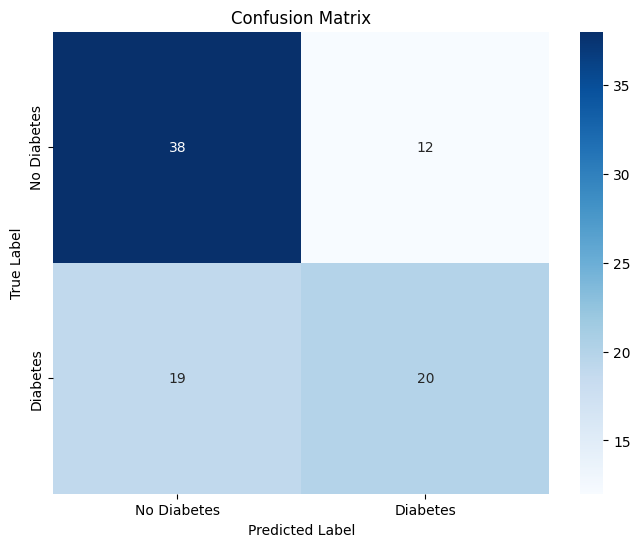


Classification Report:
--------------------------------------------------
              precision    recall  f1-score   support

 No Diabetes       0.67      0.76      0.71        50
    Diabetes       0.62      0.51      0.56        39

    accuracy                           0.65        89
   macro avg       0.65      0.64      0.64        89
weighted avg       0.65      0.65      0.65        89



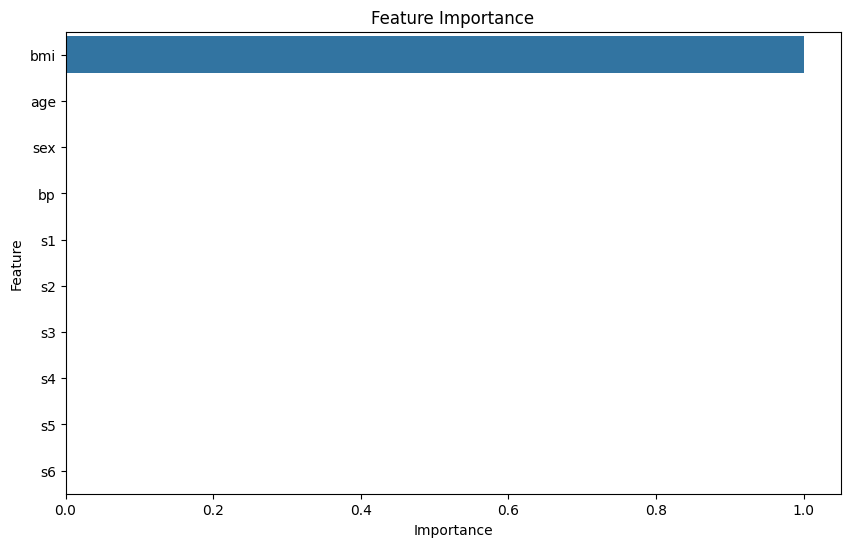


Simple Decision Rule:
--------------------------------------------------
If bmi > 0.01 → Higher risk of diabetes
If bmi ≤ 0.01 → Lower risk of diabetes

Feature Descriptions:
--------------------------------------------------
age: Age in years
sex: Gender
bmi: Body mass index
bp: Average blood pressure
s1: Total serum cholesterol
s2: Low-density lipoproteins
s3: High-density lipoproteins
s4: Total cholesterol / HDL
s5: Possibly log of serum triglycerides level
s6: Blood sugar level


In [7]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the diabetes dataset
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

# Convert the continuous target to binary (0: no diabetes, 1: diabetes)
y_binary = (y > y.mean()).astype(int)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Create a simple decision tree with depth=1
tree = DecisionTreeClassifier(max_depth=1, random_state=42)
tree.fit(X_train, y_train)

# Make predictions
y_pred = tree.predict(X_test)

# Visualize the tree
plt.figure(figsize=(12,8))
plot_tree(tree, 
          feature_names=diabetes.feature_names,
          class_names=['No Diabetes', 'Diabetes'],
          filled=True,
          rounded=True,
          fontsize=12)
plt.title("Simple Decision Tree for Diabetes Prediction")
plt.show()

# Print accuracy
print("Model Performance:")
print("-" * 50)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Print confusion matrix
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report
print("\nClassification Report:")
print("-" * 50)
print(classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes']))

# Feature importance
feature_importance = pd.DataFrame({
    'feature': diabetes.feature_names,
    'importance': tree.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Print simple decision rule
most_important_feature = feature_importance.iloc[0]['feature']
threshold = tree.tree_.threshold[0]

print("\nSimple Decision Rule:")
print("-" * 50)
print(f"If {most_important_feature} > {threshold:.2f} → Higher risk of diabetes")
print(f"If {most_important_feature} ≤ {threshold:.2f} → Lower risk of diabetes")

# Print feature descriptions
print("\nFeature Descriptions:")
print("-" * 50)
print("age: Age in years")
print("sex: Gender")
print("bmi: Body mass index")
print("bp: Average blood pressure")
print("s1: Total serum cholesterol")
print("s2: Low-density lipoproteins")
print("s3: High-density lipoproteins")
print("s4: Total cholesterol / HDL")
print("s5: Possibly log of serum triglycerides level")
print("s6: Blood sugar level")

BEST PARAMETERS:
--------------------------------------------------
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}

Best Accuracy: 0.731


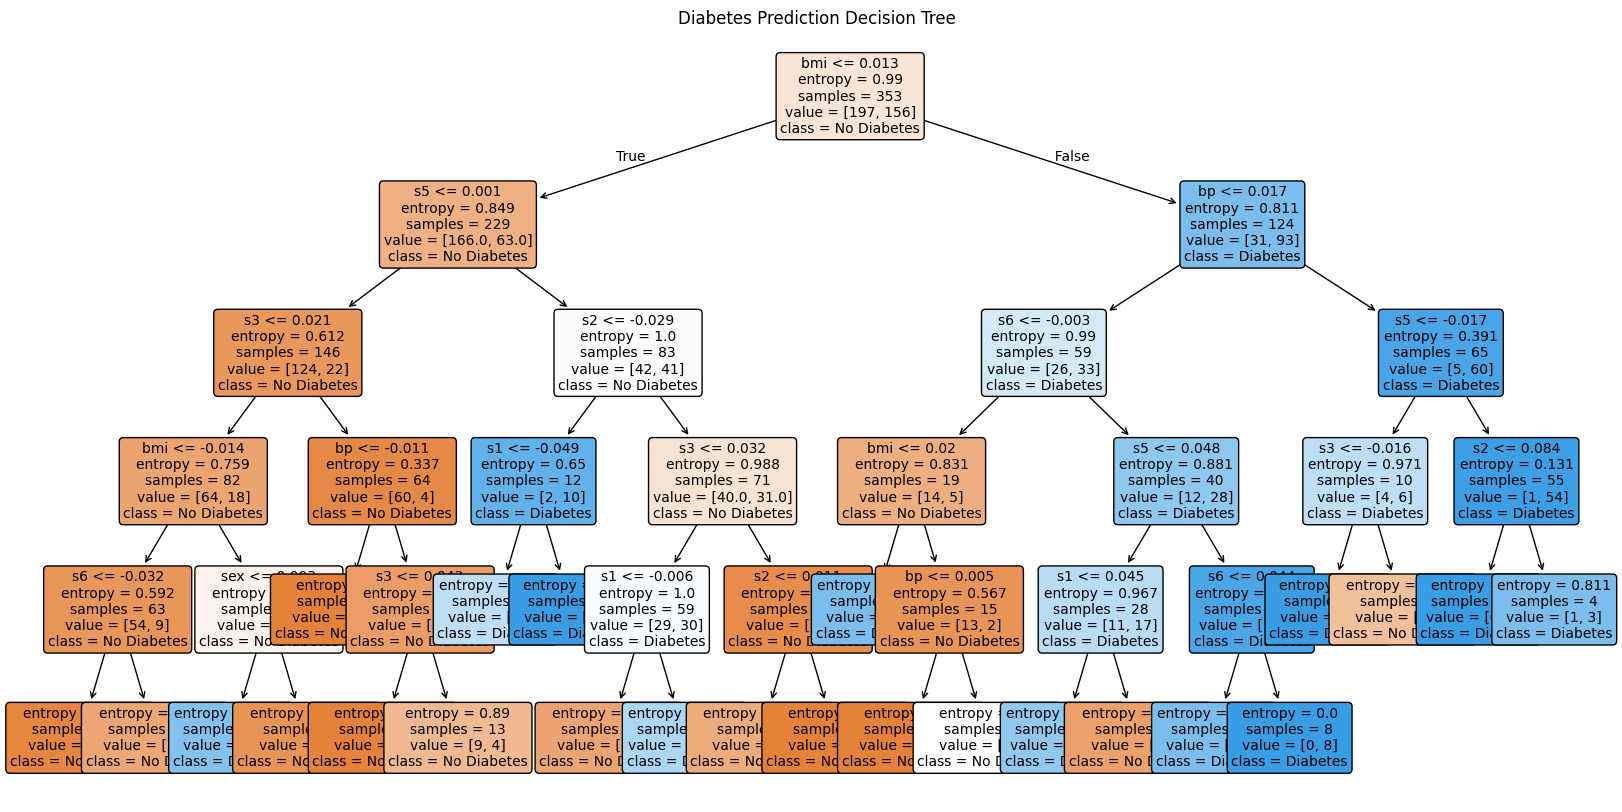


MODEL PERFORMANCE:
--------------------------------------------------
Training Accuracy: 0.847
Testing Accuracy: 0.753


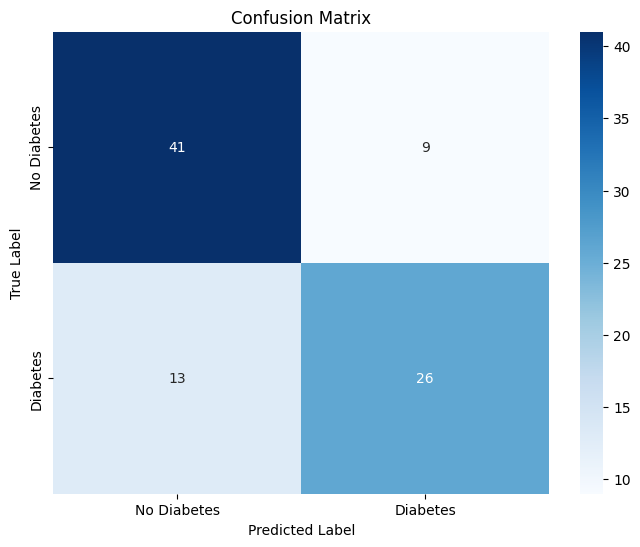


CLASSIFICATION REPORT:
--------------------------------------------------
              precision    recall  f1-score   support

 No Diabetes       0.76      0.82      0.79        50
    Diabetes       0.74      0.67      0.70        39

    accuracy                           0.75        89
   macro avg       0.75      0.74      0.75        89
weighted avg       0.75      0.75      0.75        89



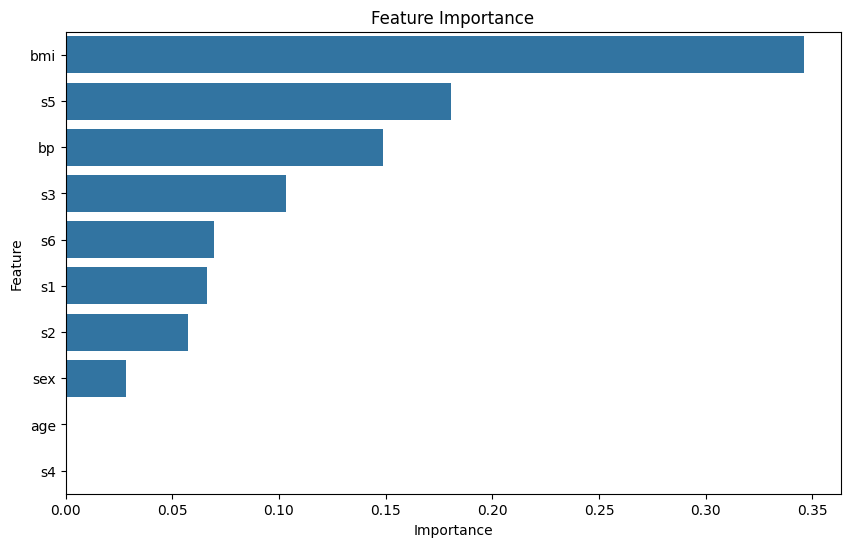


DECISION RULES:
--------------------------------------------------
IF bmi <= 0.01 AND s5 <= 0.00 AND s3 <= 0.02 AND bmi <= -0.01 AND s6 <= -0.03 THEN No Diabetes
IF bmi <= 0.01 AND s5 <= 0.00 AND s3 <= 0.02 AND bmi <= -0.01 AND s6 > -0.03 THEN No Diabetes
IF bmi <= 0.01 AND s5 <= 0.00 AND s3 <= 0.02 AND bmi > -0.01 AND sex <= 0.00 THEN Diabetes
IF bmi <= 0.01 AND s5 <= 0.00 AND s3 <= 0.02 AND bmi > -0.01 AND sex > 0.00 THEN No Diabetes
IF bmi <= 0.01 AND s5 <= 0.00 AND s3 > 0.02 AND bp <= -0.01 THEN No Diabetes
IF bmi <= 0.01 AND s5 <= 0.00 AND s3 > 0.02 AND bp > -0.01 AND s3 <= 0.04 THEN No Diabetes
IF bmi <= 0.01 AND s5 <= 0.00 AND s3 > 0.02 AND bp > -0.01 AND s3 > 0.04 THEN No Diabetes
IF bmi <= 0.01 AND s5 > 0.00 AND s2 <= -0.03 AND s1 <= -0.05 THEN Diabetes
IF bmi <= 0.01 AND s5 > 0.00 AND s2 <= -0.03 AND s1 > -0.05 THEN Diabetes
IF bmi <= 0.01 AND s5 > 0.00 AND s2 > -0.03 AND s3 <= 0.03 AND s1 <= -0.01 THEN No Diabetes
IF bmi <= 0.01 AND s5 > 0.00 AND s2 > -0.03 AND s3 <= 0.03 A

In [8]:

import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load and prepare the diabetes dataset
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = (diabetes.target > diabetes.target.mean()).astype(int)  # Convert to binary

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create GridSearch to find optimal parameters
param_grid = {
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)

# Fit the model
grid_search.fit(X_train, y_train)

# Get best model
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

print("BEST PARAMETERS:")
print("-" * 50)
print(grid_search.best_params_)
print(f"\nBest Accuracy: {grid_search.best_score_:.3f}")

# Visualize the tree
plt.figure(figsize=(20,10))
plot_tree(best_model, 
          feature_names=diabetes.feature_names,
          class_names=['No Diabetes', 'Diabetes'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Diabetes Prediction Decision Tree")
plt.show()

# Print accuracy metrics
print("\nMODEL PERFORMANCE:")
print("-" * 50)
print(f"Training Accuracy: {best_model.score(X_train, y_train):.3f}")
print(f"Testing Accuracy: {best_model.score(X_test, y_test):.3f}")

# Plot confusion matrix
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report
print("\nCLASSIFICATION REPORT:")
print("-" * 50)
print(classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes']))

# Feature importance
feature_importance = pd.DataFrame({
    'feature': diabetes.feature_names,
    'importance': best_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Extract and print decision rules
def get_decision_rules(tree, feature_names, class_names):
    n_nodes = tree.tree_.node_count
    children_left = tree.tree_.children_left
    children_right = tree.tree_.children_right
    feature = tree.tree_.feature
    threshold = tree.tree_.threshold
    value = tree.tree_.value
    
    print("\nDECISION RULES:")
    print("-" * 50)
    
    def recurse(node, depth, path):
        if children_left[node] == children_right[node]:  # leaf node
            class_index = np.argmax(value[node])
            print(f"IF {' AND '.join(path)} THEN {class_names[class_index]}")
            return
            
        name = feature_names[feature[node]]
        threshold_val = threshold[node]
        
        path_left = path + [f"{name} <= {threshold_val:.2f}"]
        recurse(children_left[node], depth + 1, path_left)
        
        path_right = path + [f"{name} > {threshold_val:.2f}"]
        recurse(children_right[node], depth + 1, path_right)
    
    recurse(0, 0, [])

# Print decision rules
get_decision_rules(best_model, diabetes.feature_names, ['No Diabetes', 'Diabetes'])

# Print feature descriptions
print("\nFEATURE DESCRIPTIONS:")
print("-" * 50)
feature_descriptions = {
    'age': 'Age in years',
    'sex': 'Gender',
    'bmi': 'Body mass index',
    'bp': 'Average blood pressure',
    's1': 'Total serum cholesterol',
    's2': 'Low-density lipoproteins',
    's3': 'High-density lipoproteins',
    's4': 'Total cholesterol / HDL',
    's5': 'Log of serum triglycerides level',
    's6': 'Blood sugar level'
}

for feature, description in feature_descriptions.items():
    print(f"{feature}: {description}")

# Print top rules based on feature importance
print("\nTOP DECISION RULES BASED ON IMPORTANT FEATURES:")
print("-" * 50)
top_features = feature_importance.head(3)['feature'].values
for feature in top_features:
    threshold = best_model.tree_.threshold[np.where(best_model.tree_.feature == 
                list(diabetes.feature_names).index(feature))[0][0]]
    print(f"Rule for {feature}:")
    print(f"- If {feature} ≤ {threshold:.2f}: Lower risk of diabetes")
    print(f"- If {feature} > {threshold:.2f}: Higher risk of diabetes")